# DS3000 Day 12 

Oct 21 2022

Admin:
- Qwickly attendance
- Let's finalize the Project Teams
    - Link to Current Teams: [Google Sheet](https://docs.google.com/spreadsheets/d/1q3TPWUPG6QPXw5FWv_IaA9ZvWMTHoxZWPJ4jTSx5bR4/edit?usp=sharing)
- Released after class:
    - quiz2
        - you have until 11:59 pm Sunday to complete it, and 2 hours to do so once started
- due next Tuesday before midnight
    - hw5

Content:
- Finish: Cleaning Data
- Begin: Basic Data Summaries

## Working with Duplicates

* Sometimes datasets contain duplicates record, which you may want to discard

### duplicated() method

Returns a boolean Series indicating whether each row is a duplicated (whether it has been observed in a previous row)

In [4]:
import pandas as pd

df_dupe = pd.read_excel('dupe_data.xlsx', na_values = ('miss'))
df_dupe

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
1,b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
2,c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
3,d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
4,e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
5,f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
6,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
7,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
8,g,163.0,59.0,50,50.0,48.0,46,49.0,NaN
9,h,175.0,72.0,43,37.0,35.0,31,NaN,NaN


In [5]:
# We have three rows with patient g
# row 6 and row 7 are identical, only row 7 is marked as duplicate (since row 6 is the original)

df_dupe.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
dtype: bool

In [6]:
# we can specify the columns by which to tell dupes, this one finds all the duplicates of patient g
df_dupe.duplicated(subset='patient')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11    False
dtype: bool

### drop_duplicates() method

* Returns a DataFrame where the duplicates have been dropped

In [7]:
df_dupe

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
1,b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
2,c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
3,d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
4,e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
5,f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
6,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
7,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
8,g,163.0,59.0,50,50.0,48.0,46,49.0,NaN
9,h,175.0,72.0,43,37.0,35.0,31,NaN,NaN


In [8]:
df_dupe.drop_duplicates()

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
1,b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
2,c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
3,d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
4,e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
5,f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
6,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
8,g,163.0,59.0,50,50.0,48.0,46,49.0,NaN
9,h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
10,i,158.0,80.0,28,NaN,38.0,34,39.0,NaN


* You can also specify a subset of columns to detect duplicates.
* Pass in a list of column names as an argument to the **drop_duplicates()** method call.

In [9]:
df_dupe.drop_duplicates(subset='patient')

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
1,b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
2,c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
3,d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
4,e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
5,f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
6,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
9,h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
10,i,158.0,80.0,28,NaN,38.0,34,39.0,NaN
11,j,169.0,79.0,33,NaN,25.0,28,NaN,NaN


* By default, both duplicated() and drop_duplicates() keep the first observed value combination. 
* If you want to keep the last value, pass in **keep="last"**
* This can be used for example where data is ordered chronologically and the last mention is the most recent one (here: patient g had a duplicate record because their trial 2 data was eventually found)

In [10]:
df_dupe.drop_duplicates(subset='patient', keep='last')

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
1,b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
2,c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
3,d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
4,e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
5,f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
8,g,163.0,59.0,50,50.0,48.0,46,49.0,NaN
9,h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
10,i,158.0,80.0,28,NaN,38.0,34,39.0,NaN
11,j,169.0,79.0,33,NaN,25.0,28,NaN,NaN


## Replacing Values

* Beyond filtering or fill in missing data, we can replace certain values with new values.

### replace()

* **df.replace(current_value, new_value)**
* If you want to replace multiple values at once, pass a list and then the substitute value(s)

In [11]:
df = pd.DataFrame({'a': [2, 5, -99, 0, -999],
                   'b': [1, -999, 4, -99, 123]})
df

,a,b
0,2,1
1,5,-999
2,-99,4
3,0,-99
4,-999,123


In [12]:
# replaces isntances of -99 or -999 in dataframe with NaN (across whole dataframe)
import numpy as np

df.replace([-99, -999], np.nan)

,a,b
0,2.0,1.0
1,5.0,NaN
2,NaN,4.0
3,0.0,NaN
4,NaN,123.0


In [13]:
df

,a,b
0,2,1
1,5,-999
2,-99,4
3,0,-99
4,-999,123


In [14]:
# replaces -99 with "NaN" and -999 with 0 (across whole dataframe)
df.replace([-99, -999], [np.nan, 0])
# equivalent to doing this twice in a row
# df = df.replace(-99, np.nan)
# df.replace(-999, 0)

,a,b
0,2.0,1.0
1,5.0,0.0
2,NaN,4.0
3,0.0,NaN
4,0.0,123.0


In [15]:
# yet another way to replace -99 with "NaN" and -999 with 0 (across whole dataframe)
df.replace({-99: np.nan, -999: 0})

,a,b
0,2.0,1.0
1,5.0,0.0
2,NaN,4.0
3,0.0,NaN
4,0.0,123.0


In [16]:
# replace -99 with "NaN" in column 'a'.  Replace -999 with 0 in column 'b'
df.replace({'a': -99, 'b': -999}, value={'a': np.nan, 'b': 0})

,a,b
0,2.0,1
1,5.0,0
2,NaN,4
3,0.0,-99
4,-999.0,123


For example, all too often in datasets where the lat, lon is not known, the default value is 0 instead of NaN... but 0, 0 is an actual place in the world!

<img src="https://i.ibb.co/ZhT1Svb/google-maps.png" style="width: 60%;">

In [17]:
df_locs = pd.read_csv('locations.csv')
df_locs

,city,lat,lon,population
0,Boston,42.3603,-71.0578,689326
1,Lusaka,-15.4167,28.2833,2731696
2,Atlantis,0.0000,0.0000,0
3,Sydney,-33.8678,151.2100,5231147


In [18]:
df_locs.replace(to_replace={'lat': 0, 'lon': 0}, value={'lat': np.nan, 'lon': np.nan})

,city,lat,lon,population
0,Boston,42.3603,-71.0578,689326
1,Lusaka,-15.4167,28.2833,2731696
2,Atlantis,NaN,NaN,0
3,Sydney,-33.8678,151.2100,5231147


### map()  

* Perform a function on every element of a Series
* The function should return a value
* remember, each column in a DataFrame is a Series, so it can be performed on each value of a DataFrame column

In [19]:
df_miss = pd.read_excel('miss_data.xlsx', na_values = ('miss'))
df_miss

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
1,b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
2,c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
3,d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
4,e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
5,f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
6,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
7,h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
8,i,158.0,80.0,28,NaN,38.0,34,39.0,NaN
9,j,169.0,79.0,33,NaN,25.0,28,NaN,NaN


In [20]:
def introduce(pat_str):
    return f'Record for patient {pat_str}'

df_miss['patient'].map(introduce)

0    Record for patient a
1    Record for patient b
2    Record for patient c
3    Record for patient d
4    Record for patient e
5    Record for patient f
6    Record for patient g
7    Record for patient h
8    Record for patient i
9    Record for patient j
Name: patient, dtype: object

### applymap()

* Same as `map()` but rather with a Series, it runs the function elementwise on the whole DataFrame
* let's give every patient a bonus of 5 points

In [21]:
df_miss

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
1,b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
2,c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
3,d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
4,e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
5,f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
6,g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
7,h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
8,i,158.0,80.0,28,NaN,38.0,34,39.0,NaN
9,j,169.0,79.0,33,NaN,25.0,28,NaN,NaN


In [22]:
df_miss.set_index('patient', inplace=True)
df_miss

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN


In [23]:
df_miss_trials = df_miss.iloc[:,2:]
df_miss_trials

,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,
a,45,39.0,NaN,42,40.0,NaN
b,47,49.0,43.0,48,NaN,NaN
c,42,NaN,46.0,47,42.0,NaN
d,23,NaN,NaN,17,NaN,NaN
e,38,40.0,44.0,48,NaN,NaN
f,34,36.0,29.0,22,NaN,NaN
g,50,50.0,NaN,46,49.0,NaN
h,43,37.0,35.0,31,NaN,NaN
i,28,NaN,38.0,34,39.0,NaN


In [24]:
def apply_bonus(x):
    return x+5

df_miss_trials.applymap(apply_bonus)

,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,
a,50,44.0,NaN,47,45.0,NaN
b,52,54.0,48.0,53,NaN,NaN
c,47,NaN,51.0,52,47.0,NaN
d,28,NaN,NaN,22,NaN,NaN
e,43,45.0,49.0,53,NaN,NaN
f,39,41.0,34.0,27,NaN,NaN
g,55,55.0,NaN,51,54.0,NaN
h,48,42.0,40.0,36,NaN,NaN
i,33,NaN,43.0,39,44.0,NaN


### apply() method

* Apply a function along an axis of the DataFrame.
* The function should take a DataFrame and return either a Pandas object (DataFrame or Series) or a scalar

Let's calculate the mean of each patient's trials but without the worst score

In [25]:
df_miss

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN


In [26]:
def mean_skip_worst(row):
    # get only the trials, without the height and weight
    trials = row.loc['trial0':]
    
    # sort the values
    trials = trials.sort_values()
    
    # skip the worst score (first in the sorted series)
    best_trials = trials[1:]
    
    # return the mean
    return best_trials.mean()

In [27]:
# axis=1 => different inputs to function are different columns
# ! axis is kind of funny to remember here
df_miss.apply(mean_skip_worst, axis=1)

patient
a    42.333333
b    48.000000
c    45.000000
d    23.000000
e    44.000000
f    33.000000
g    49.666667
h    38.333333
i    37.000000
j    30.500000
dtype: float64

## Lecture Break/Practice
### (in the interest of time, I will give you only a few minutes to get started, then we'll continue the problem together)

* Load `grades.csv` treating -99 as missing values
* If any student `name` is mentioned multiple times, only keep the row with the last mention
* Assume that NaNs mean the student didn't submit, and replace them with 0
* use `apply()` to calculate the mean score of each assignment among all students without considering the both lowest *and* the highest score in each assignment 
    * you'll need to write a function which, given a list of values, returns the average of everything but the highest and lowest values

In [28]:
# load in the data

In [29]:
# replace NaN with 0

In [30]:
# get mean of quiz0 column, ignoring min and max, for practice

In [31]:
# define function that gets mean for any column

In [32]:
# apply to all columns

In [33]:
# (another way) how to do it without setting the index?

## Describing Sets of Numbers

- types of data
    - numeric vs categorical
    
- measures of central tendency (and when to use each)
    - mean
    - median
    - mode
     
- measures of dispersion
    - variance and standard deviation

## Types of Data

### Categorical Data
- categorical data need not be ordered
- examples:
    - favorite color of person 
        - green, blue, red, ...
    - which network discusses a stock most
        - cnn, fox, msnbc
    - type of weather in a given day
        - rainy, sunny, windy
    
### Numerical (continuous) data:
- data always has an order (ordered data)
    - for every pair of items x, y in the data either:
        - x < y
        - x > y
        - x = y
- between every pair of items, there is another item
- examples:
    - height of a person
        - 5'6", 5'10"
    - value of a stock
        - \\$123.45, \\$8
    - amount of rain in a day
        - 2", 0"

### Question
Are zipcodes categorical or numerical data?

## Measures of Center for Numerical Data:

- Sample Mean
- Sample Median

## Sample Mean

In [34]:
df_grades = pd.DataFrame({'quiz1': [6, 7, 8, 8, 6, 7, 7, 6, 8], 
                          'quiz2': [6, 5, 6, 10, 9, 5, 6, 10, 6]})
df_grades

,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


**Sample Mean** of a population is the arithmetic average:
$$ \bar{x} = \frac{1}{N} \sum_i x_i $$
(add all entries together and divide by number of entries)

In [35]:
df_grades.mean()

quiz1    7.0
quiz2    7.0
dtype: float64

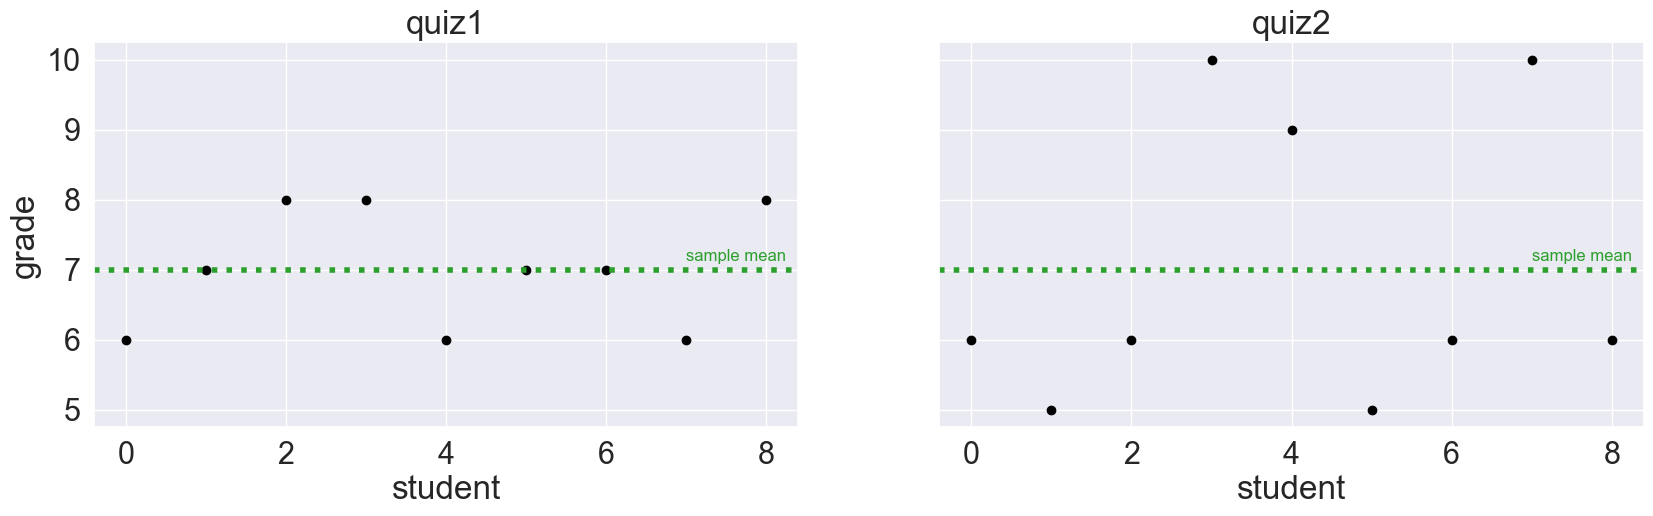

In [36]:
## The plots are just for illustration, I don't intend to cover the plotting 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'o', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)

## Sample Median


**Sample Median** is the "halfway" point of a set of sorted values:
- half of the remaining data is greater than median
- half of the remaining data is less than  median

If a set of numbers has an even number of points then median is mean of middle most two points.

In [38]:
df_grades.shape[0]

9

In [39]:
df_grades.median()

quiz1    7.0
quiz2    6.0
dtype: float64

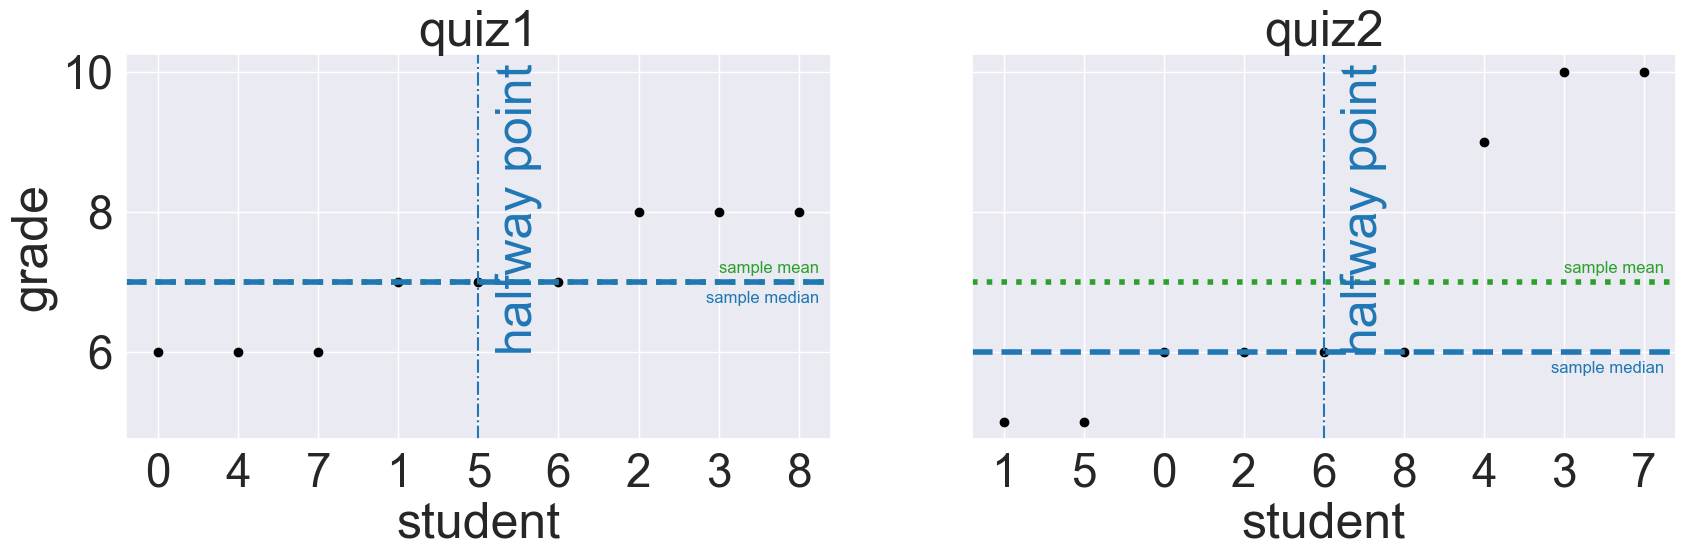

In [40]:
## The plots are just for illustration, I don't intend to cover the plotting 

sns.set(font_scale=3)

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label].sort_values().values, 'o', color='black')
    ax.set_xticks(range(0, len(df_grades)))
    ax.set_xticklabels(df_grades[label].sort_values().index)
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
    
    ax.axhline(df_grades[label].median(), color='tab:blue', ls='--', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].median()-.125), text='sample median',
               ha='right', fontsize=12, color='tab:blue', va='top')
    
    ax.annotate(xy = (.525, .975), color='tab:blue', xycoords='axes fraction', rotation=90, 
               text = 'halfway point', va='top', ha='left')
    
    ax.axvline((len(df_grades)-1)/2, ls='-.', color='tab:blue')
    
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)

Median is an attractive measure of center when:
- data is inconsistently distributed (e.g. log scaled data)
- data contains outliers
    **outlier:** a value which is atypically far from the average (datum are typically closer to the average)

## Another Measure of Center

- Sample Mode

In [41]:
df_grades

,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


**Sample Mode** is the most common value in a dataset. You can find the mode for numerical OR categorical data.

Pandas has a mode function, but I think its more informative to call `Series.value_counts()` which yields a series of how often each value occurs in a series:

In [42]:
# all three df_grades are equally likely - the mode is not unique
df_grades['quiz1'].value_counts()

6    3
7    3
8    3
Name: quiz1, dtype: int64

In [43]:
# mode is unique
df_grades['quiz2'].value_counts()

6     4
5     2
10    2
9     1
Name: quiz2, dtype: int64

## Measures of Spread for Numerical Data:

- Sample Variance
- Sample Standard Deviation

## Observations vs Ground Truth

    Fishing in a new pond, you catch fish which are 3 lbs and another which is 5 lbs.  
    What can (and can't) you say about the average fish weight in the pond?


- **Observed** data points can be collected from an experiment.
- The **Ground Truth** describes information which is absolutely true.  
    - we rarely know ground truth information about distributions
        - instead ... we estimate them
        
       
### Language (and notation) to distinguish between observations and ground truth:

| **Observed**                             | **Ground Truth**            |
|------------------------------------------|-----------------------------|
| Sample Mean $\bar{x}$                    | Expected Value $E[x], \mu$       |
| Sample Standard Deviation $\hat{\sigma}$ | Standard Deviation $\sigma$ |
| Sample Variance $\hat{\sigma^2}$         | Variance $\sigma^2$         |

(In DS practice, because almost all our data is observed, we rarely say "Sample Mean" and usually just say "Mean", and usually when folks just say "Standard Deviation" or "Variance" they mean the "Sample Standard Deviation" and "Sample Variance")
    

### Variance and Sample Variance
**Variance** is the average squared distance from the mean. 
$$ \sigma^2 = \frac{1}{N} \sum_i (x_i-\mu)^2 $$
where $\mu$ is the expected value of the distribution that $x_i$ came from.

Rarely do we know the distribution (or its mean $\mu$).  The best we can do is estimate this value as the **Sample Variance**:
$$ \hat{\sigma}^2 = \frac{1}{N-1} \sum_i (x_i-\bar{x})^2 $$
where $\bar{x}$ is the sample mean.  

**Note the $\frac{1}{N-1}$ term in Sample Variance (Bessel's Correction) differs from the $\frac{1}{N}$ term in Variance above.**

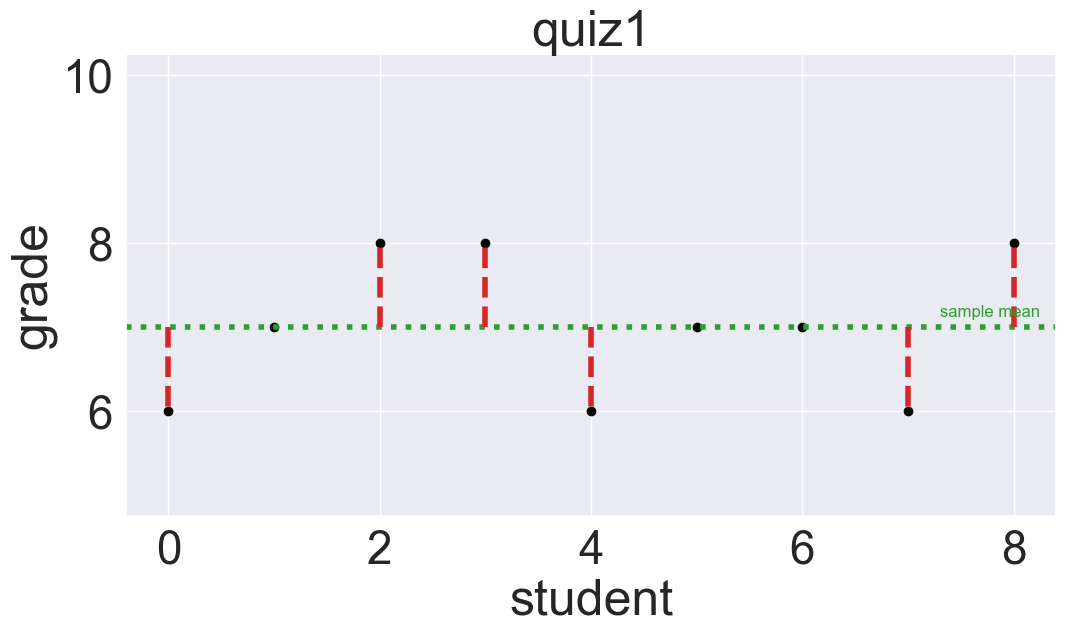

In [44]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
label='quiz1'
ax.plot(df_grades[label], 'o', color='black')
ax.set_title(label)
ax.set_xlabel('student')
ax.grid(True)
ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
           ha='right', fontsize=12, color='tab:green')
ax.set_ylim([4.75, 10.25])

for idx, el in enumerate(df_grades[label]):
    ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

ax.set_ylabel('grade')
f.set_size_inches(12, 6)

Here we have six instances where the distance is 1 (and the square of distance is also 1). Sum that and divide by the number of students -1 (8) and we get $\frac{6}{8}=\frac{3}{4}$

In [45]:
df_grades['quiz1'].var()

0.75

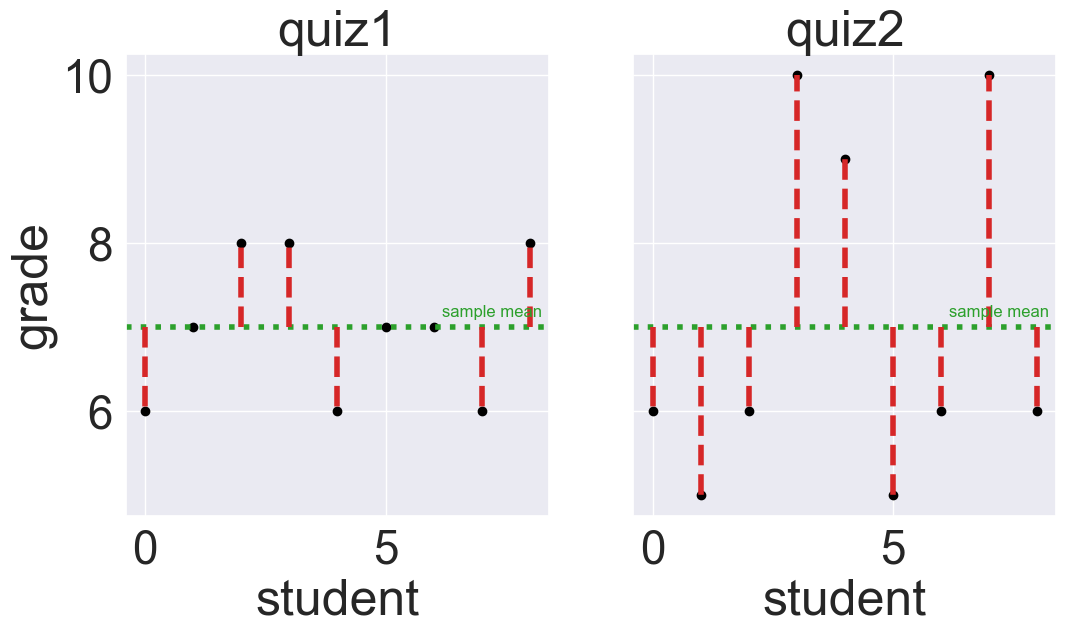

In [46]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'o', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
    ax.set_ylim([4.75, 10.25])

    for idx, el in enumerate(df_grades[label]):
        ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

axes[0].set_ylabel('grade')
f.set_size_inches(12, 6)

In Quiz 2 we see that the sample mean is the same, but the distances from the mean are bigger:
$$ \hat{\sigma}^2 = \frac{1}{9-1} \cdot(1^2 + 2^2 + 1^2 + 3^2 + 2^2 + 2^2 + 1^2 + 3^2 + 1^2) = \frac{34}{8} = 4.25$$

In [48]:
df_grades.var()

quiz1    0.75
quiz2    4.25
dtype: float64

Even though the average for the two quizes are the same it seems like the quizes were different:
* all the students found the first quiz similarly difficult.
* some students nailed the second quiz and some there were also some did quite poorly

### Standard deviation
Standard deviation is just the square root of the variance:

$$ \hat{\sigma} = \sqrt{\hat{\sigma}^2} = \sqrt{\frac{1}{N-1} \sum_i (x_i-\bar{x})^2} $$

#### Common misconception:
Wait, square root of average squared distance from mean ... isn't it just the average distance from mean?

No!
* square root of a sum does not equal the sum of square roots 

In [49]:
import numpy as np

# compute standard deviation
df_grades.std()

quiz1    0.866025
quiz2    2.061553
dtype: float64

In [50]:
# compute square root of variances (same as std dev)
np.sqrt(df_grades.var())

quiz1    0.866025
quiz2    2.061553
dtype: float64

In [51]:
# examining the misconception
dist_to_mean = (df_grades - df_grades.mean(axis=0)).abs()

# the average distance to mean is not the standard deviation
dist_to_mean.mean()

quiz1    0.666667
quiz2    1.777778
dtype: float64

## If time (if not, next time): Sampling and Covariance/Correlation

Let's get our Pokemon dataset:

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)

def make_lower(x):
    return str(x).lower()

df_poke = pd.read_csv('pokedata.csv')
df_poke = df_poke.rename(make_lower, axis = 1)
df_poke = df_poke.set_index('pokedex')
df_poke.head()

,pokemon,maintype,secondarytype,height,weight,damage,basespeed,attack,defense
pokedex,,,,,,,,,
1,Bulbasaur,Grass,Poison,24,25.2,45,45,49,49
2,Ivysaur,Grass,Poison,39,28.7,60,60,62,63
3,Venusaur,Grass,Poison,79,220.5,80,80,82,83
4,Charmander,Fire,NaN,24,18.7,39,65,52,43
5,Charmeleon,Fire,NaN,43,41.9,58,80,64,58


In [105]:
df_poke.corr()

,height,weight,damage,basespeed,attack,defense
height,1.000000,0.565559,0.243375,0.199962,0.309587,0.359457
weight,0.565559,1.000000,0.445781,0.052746,0.456986,0.411103
damage,0.243375,0.445781,1.000000,-0.041172,0.296653,0.119774
basespeed,0.199962,0.052746,-0.041172,1.000000,0.202007,-0.053252
attack,0.309587,0.456986,0.296653,0.202007,1.000000,0.482674
defense,0.359457,0.411103,0.119774,-0.053252,0.482674,1.000000


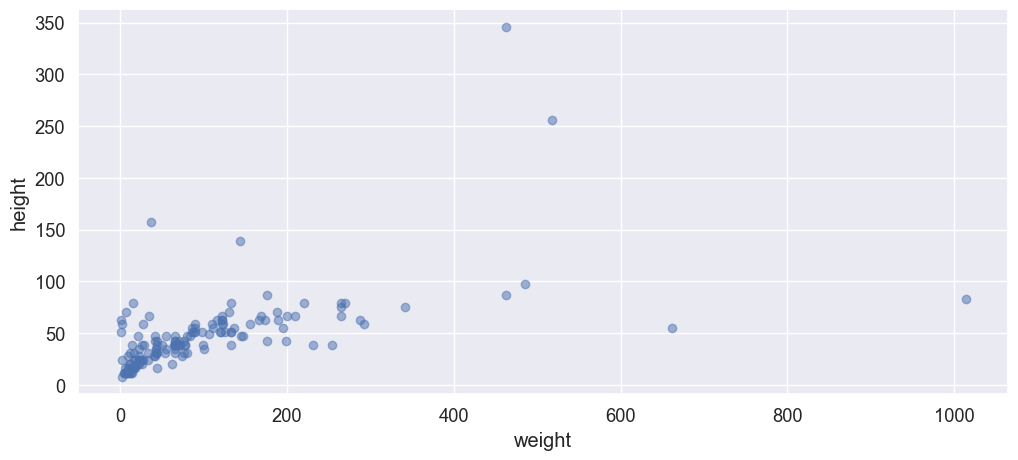

In [106]:
x_feat = 'weight' # a pokemon's weight
y_feat = 'height' # a pokemon's height
plt.scatter(data=df_poke, x=x_feat, y=y_feat, alpha=.5)
plt.xlabel(x_feat)
plt.ylabel(y_feat)
plt.gcf().set_size_inches((12, 5))

### Sampling a datapoint: drawing data from some known distribution

- Why would we want to get synthetic data?
    - Algorithm Auditing
        - build fake (but convincing) CVs of real people, send to recruiters and see what bias they may have
    - Build an "anonymous" dataset which looks like another one
        - we may be able to publiclly release a synthetic dataset of medical data for researchers to study without worrying about one's identify being compromised
            - must look like original data to be helpful

## Building a "fake" pokemon

**Goal**: 

How could we generate a "fake" datapoint representing the `weight` and `height` which would fit in among the previous scatter?

**Approach**:
- **Step 1:** Estimate the discrete distributions of `weight` and `height`
- **Step 2:** Sample from each discrete distribution

## Step 1: Estimate the discrete distributions of `weight` and `height`

A discrete distribution is a set of items and a probability of each item occuring.

In [56]:
# a fair coin flip
items = ['heads', 'tails']
prob = [.5, .5]

In [57]:
# a fair 6 sided die
items = [1, 2, 3, 4, 5, 6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

How can we get an `items` and `prob` which is similar to the `body_mass_g` observed in our data? 

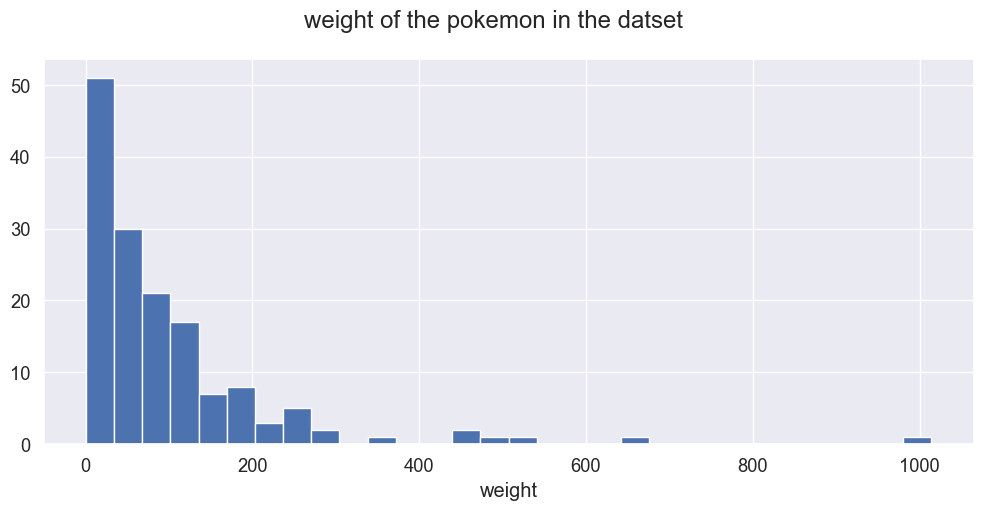

In [107]:
feat = 'weight'
plt.hist(df_poke[feat], bins=30)
plt.xlabel(feat)
plt.suptitle(f'{feat} of the pokemon in the datset')
plt.gcf().set_size_inches((12, 5))

### ... one small step for our graph, one giant leap in our interpretation of it ...

(pay attention to the title change between the histograms)

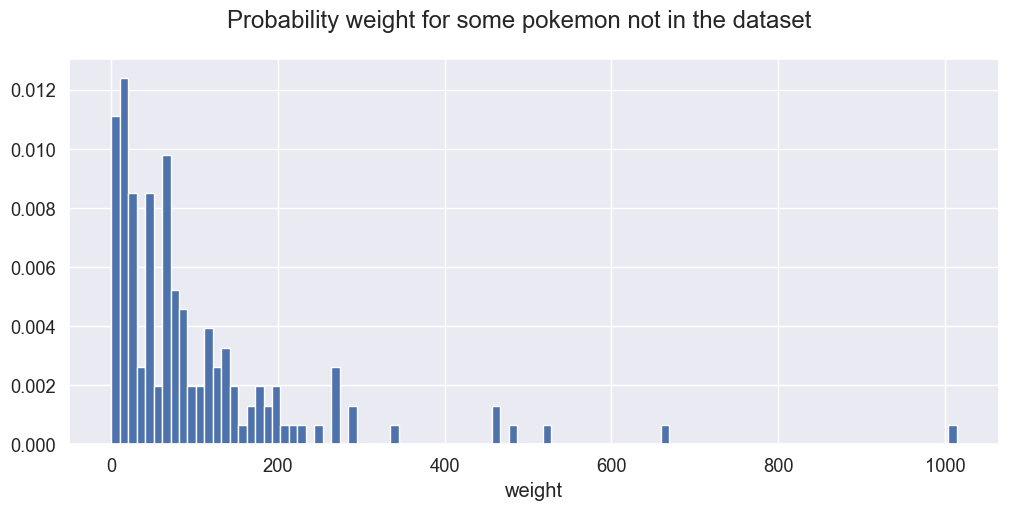

In [108]:
feat = 'weight'
plt.hist(df_poke[feat], bins=100, density=True)
plt.xlabel(feat)
plt.suptitle(f'Probability {feat} for some pokemon not in the dataset')
plt.gcf().set_size_inches((12, 5))

Above, we assume that the `weight` of some new pokemon follows the distribution defined by our given pokemon.

In other words, if 10% of our pokemon have a weight between 200 - 210 lbs, then there's a 10% chance some new fake pokemon will have this particular weight.

In [109]:
import numpy as np

feat = 'weight'
count_per_bin, bins = np.histogram(df_poke[feat], bins=30)
bins

array([2.00000000e-01, 3.39966667e+01, 6.77933333e+01, 1.01590000e+02,
       1.35386667e+02, 1.69183333e+02, 2.02980000e+02, 2.36776667e+02,
       2.70573333e+02, 3.04370000e+02, 3.38166667e+02, 3.71963333e+02,
       4.05760000e+02, 4.39556667e+02, 4.73353333e+02, 5.07150000e+02,
       5.40946667e+02, 5.74743333e+02, 6.08540000e+02, 6.42336667e+02,
       6.76133333e+02, 7.09930000e+02, 7.43726667e+02, 7.77523333e+02,
       8.11320000e+02, 8.45116667e+02, 8.78913333e+02, 9.12710000e+02,
       9.46506667e+02, 9.80303333e+02, 1.01410000e+03])

In [110]:
count_per_bin

array([51, 30, 21, 17,  7,  8,  3,  5,  2,  0,  1,  0,  0,  2,  1,  1,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1], dtype=int64)

In [111]:
# normalize counts per bin
prob = count_per_bin / sum(count_per_bin)

# discard last element in bins
# (let each bin be represented by its leftmost point ... easy to do but not precise)
items = bins[:-1]

In [112]:
prob

array([0.33774834, 0.1986755 , 0.13907285, 0.11258278, 0.04635762,
       0.05298013, 0.01986755, 0.03311258, 0.01324503, 0.        ,
       0.00662252, 0.        , 0.        , 0.01324503, 0.00662252,
       0.00662252, 0.        , 0.        , 0.        , 0.00662252,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00662252])

In [113]:
items

array([2.00000000e-01, 3.39966667e+01, 6.77933333e+01, 1.01590000e+02,
       1.35386667e+02, 1.69183333e+02, 2.02980000e+02, 2.36776667e+02,
       2.70573333e+02, 3.04370000e+02, 3.38166667e+02, 3.71963333e+02,
       4.05760000e+02, 4.39556667e+02, 4.73353333e+02, 5.07150000e+02,
       5.40946667e+02, 5.74743333e+02, 6.08540000e+02, 6.42336667e+02,
       6.76133333e+02, 7.09930000e+02, 7.43726667e+02, 7.77523333e+02,
       8.11320000e+02, 8.45116667e+02, 8.78913333e+02, 9.12710000e+02,
       9.46506667e+02, 9.80303333e+02])

In [114]:
def estimate_distribution(x, n_bins=30):
    """ estimates a discrete distribution from a set of samples
    
    Args:
        x (np.array): a set of samples
        n_bins (int): number of outputs of discrete distribution
        
    Returns:
        items (np.array): items output from distribution
        prob (np.array): probability of each item
    """
    count_per_bin, bins = np.histogram(x, bins=n_bins)

    # normalize counts per bin
    prob = count_per_bin / sum(count_per_bin)

    # discard last element in bins
    # (let each bin be represented by its leftmost point)
    items = bins[:-1]
    
    return items, prob

In [115]:
items, prob = estimate_distribution([1, 1, 1, 1, 1, 2, 3, 3, 3, 3], n_bins=10)
items, prob

(array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8]),
 array([0.5, 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.4]))

## Step 2: Sampling from a discrete distribution

In [96]:
import numpy as np

items = [10, 100, 123]
prob = [.3, .1, .6]

# select one of the items with given probability
np.random.choice(a=items, p=prob)

10

Seems like it works ... lets check more thoroughly by repeating the experiment:

In [97]:
n = 10000
sample_vector = np.random.choice(a=items, p=prob, size=n)

In [98]:
from collections import Counter

# Counter returns a dictionary which "counts" how many of every element appears
Counter(['a', 'a', 'a', 'b', 'b', 'c'])

Counter({'a': 3, 'b': 2, 'c': 1})

In [99]:
Counter(sample_vector)

Counter({123: 6045, 10: 2967, 100: 988})

## Great!  Let's produce (sample) some "fake" pokemon!

In [123]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

n_fake_pokemon = 50

# estimate distributions
item_wt, prob_wt = estimate_distribution(df_poke['weight'], n_bins=100)
item_ht, prob_ht = estimate_distribution(df_poke['height'], n_bins=100)

df_pokemon_fake = pd.DataFrame()
for fake_pokemon_idx in range(n_fake_pokemon):
    # generate a fake weight and height
    weight = np.random.choice(a=item_wt, p=prob_wt)
    height = np.random.choice(a=item_ht, p=prob_ht)
    
    # store new penguin in dataframe
    dict_fake = {'weight': weight, 
                 'height': height}
    df_pokemon_fake = df_pokemon_fake.append(dict_fake, ignore_index=True)
    
df_pokemon_fake.head()

,weight,height
0,0.200,45.18
1,71.173,51.94
2,10.339,14.76
3,111.729,28.28
4,61.034,45.18


## Are our "fake" pokemon convincing?

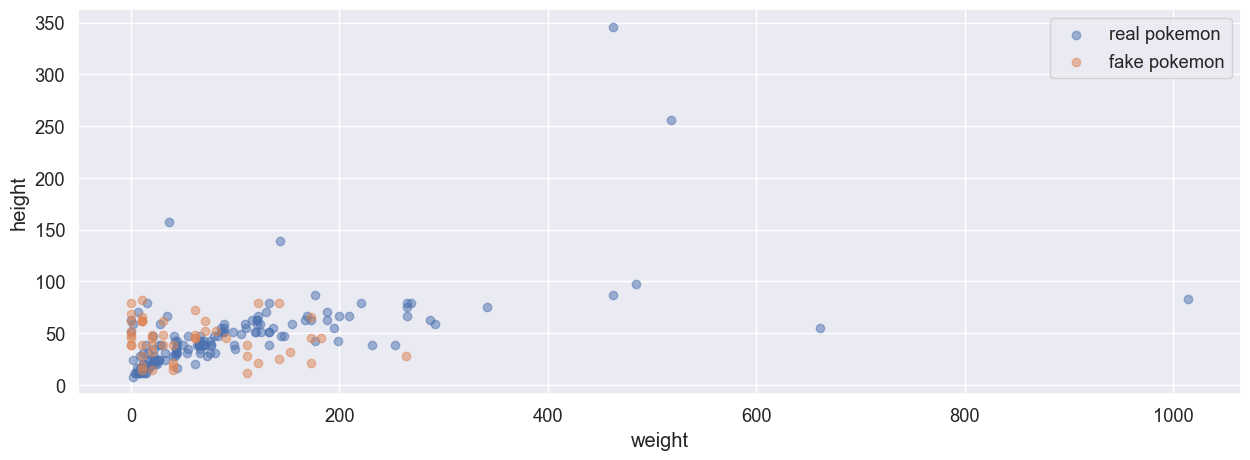

In [124]:
x_feat = 'weight'
y_feat = 'height'
plt.scatter(data=df_poke, x=x_feat, y=y_feat, alpha=.5, label='real pokemon')
plt.scatter(data=df_pokemon_fake, x=x_feat, y=y_feat, alpha=.5, label='fake pokemon')
plt.legend()
plt.xlabel(x_feat)
plt.ylabel(y_feat)
plt.gcf().set_size_inches((15, 5))

### Zoom in to check more carefully:

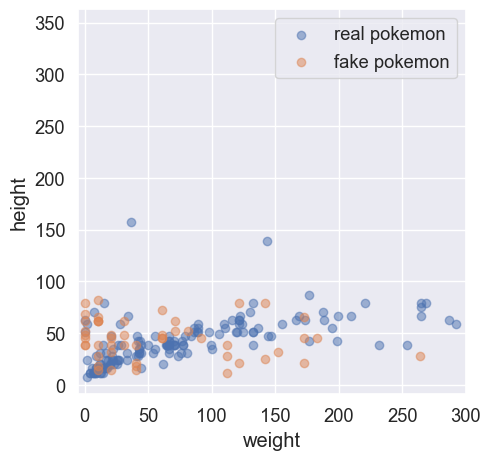

In [126]:
plt.scatter(data=df_poke, x=x_feat, y=y_feat, alpha=.5, label='real pokemon')
plt.scatter(data=df_pokemon_fake, x=x_feat, y=y_feat, alpha=.5, label='fake pokemon')
plt.legend()
plt.xlabel(x_feat)
plt.ylabel(y_feat)
plt.xlim(-5, 300)
plt.gcf().set_size_inches((5, 5))

## What went wrong?

We need a way of encapsulating how `weight` and `height` are related; i.e. positively. As weight increases, pokemon height tends to increase. Our way of simulating the data **did not account for this**.

## NEXT TIME: Covariance and Correlation

### Co-variance & correlation: Qualitatively
(How two values vary together)

The behavior between any two values x and y can be summarized in one of the three ways:
1. as x gets larger y typically gets larger too
    - ex: 
        - `x=temp on some day`
        - `y=number of people on the beach on the same day`
    - covariance & correlation is positive
2. as x gets larger y typically doesn't get larger or smaller
    - ex: 
        - `x=individual's favorite number`
        - `y=number of hot dogs that individual has eaten in their lifetime`
    - covariance & correlation is zero
3. as x gets larger, y typically gets smaller
    - ex: 
        - `x=average speed of driver on 10 mile commute`
        - `y=average commute time of driver on 10 mile commute`
    - covariance & correlation are negative